# Prosper Loan Data
## by Hamza Metawea

## Investigation Overview

Prosper is a peer-to-peer lending platform. Borrowers can find competitive rates for personal loans with one, three or five-year terms. Behind the scenes, loans are funded by investors, not Prosper itself. Prosper offers loan rates instantly without affecting your credit score.
Our goal is to try to answer questions that we think it might be benficail to the an investor wants to invest his money,we will try to ansewr some question ralted to the factors affect EstimatedEffectiveYield and Return.            


## Dataset Overview
This dataset is a financial dataset of the loans, borrowers, lenders, interest rates of Prosper or Prosper Marketplace Inc. which is a San Francisco, California based . So in this company you are rthier a borrower or an investor
In this dataset, we are using the data from the Posper to analyse it and trying to find pattern and generate valuable insights and obseravation.The dataset is comprised of 81 variables and contains 113937 observations.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [78]:
%cd "C:\Users\user\.jupyter"

C:\Users\user\.jupyter


In [6]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution EstimatedEffectiveYield)

- let's look on distribution of the variable of interest: lender yield & EstimatedEffectiveYield
- PLot tends to be Truncated or Heart-Cut Distribution , the iEstimatedEffectiveYield looks normal distribution with the tails cut off and one out lier near  rate = to 30% .


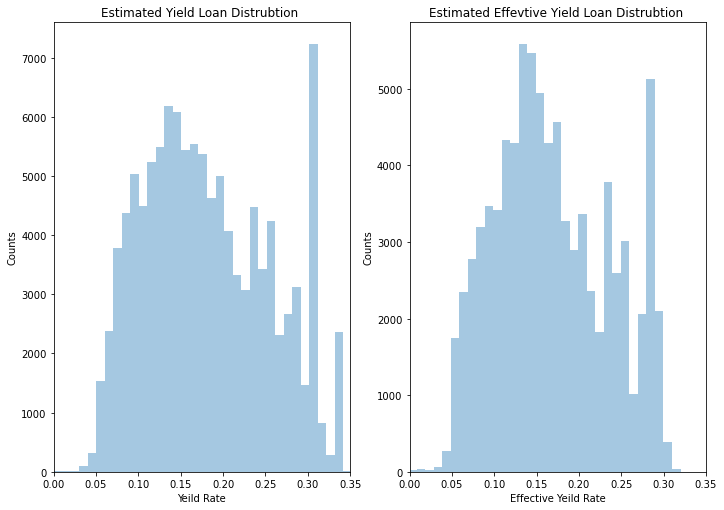

In [45]:
plt.figure(figsize=( 11.69, 8.27))
plt.subplot(1,2,1)
plt.ylabel('Counts')
sb.distplot(loan_data['LenderYield'] , kde=False);
plt.xlabel('Yeild Rate')
plt.title('Estimated Yield Loan Distrubtion ')
plt.xlim(0 ,.35)
plt.subplot(1,2,2)
plt.ylabel('Counts')
sb.distplot(loan_data['EstimatedEffectiveYield'] , kde=False);
plt.xlabel('Effective Yeild Rate')
plt.xlim(0 ,.35);
plt.title('Estimated Effevtive Yield Loan Distrubtion ')
plt.show()

## (Distribution delinquent)

> the term "delinquent In the personal finance field, commonly refers to a situation where a borrower is late or overdue on a payment, such as income taxes, a mortgage, an automobile loan, or a credit card account. CurrentDelinquencie : Number of accounts delinquent at the time the credit profile was pulled. AmountDelinquent : Dollars delinquent at the time the credit profile was pulled.
- statiscs showes more than 75% equals to 0
- Plot also shows most of the data around 0 means that low level of Delinquencies gives a good sign for an investor 

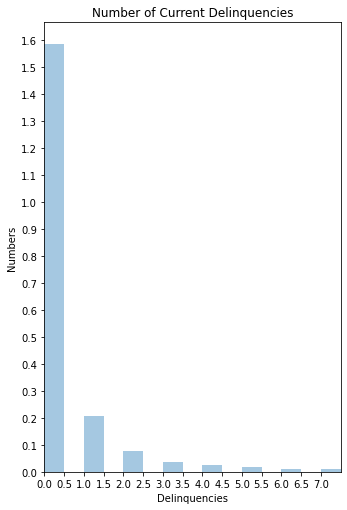

In [47]:
plt.figure(figsize=[ 11.69, 8.27])
plt.subplot(1,2,1)
bins= np.arange(0 ,loan_data['CurrentDelinquencies'].max()+.5 , .5 )
sb.distplot(loan_data['CurrentDelinquencies'],bins=bins)
plt.title('Number of Current Delinquencies')
plt.xlim((0,7.5));
plt.xticks(np.arange(0,7.5,.5));
plt.yticks(np.arange(0,1.7,.1))
plt.xlabel('Delinquencies');
plt.ylabel('Numbers');

## (Distribution  AvailableBankcardCredite)

> One of the important factors to the investor/lender is the AvailableBankcardCredite which isThe total available credit via bank card at the time the credit profile was pulled.
> Plot is Right skwed with one peak around 2000 which gives neagtive sign so far for an investor since most creditworthy applicants with stable incomes can expect credit card credit limits between 3500 and 7500 Dollars. High-income applicants with excellent credit might expect a credit limit of up to or more than 10000.



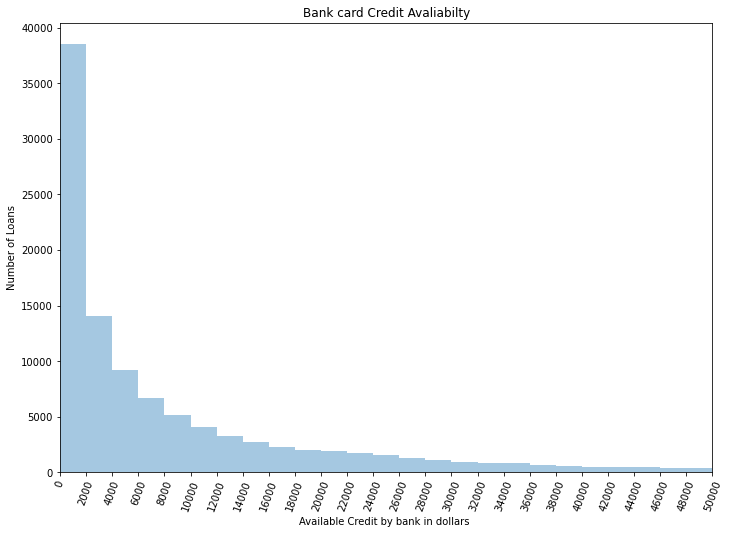

In [52]:
plt.figure(figsize=[ 11.69, 8.27])
bins = (np.arange(0,55000,2000))
default_color=sb.color_palette()[0]
sb.distplot(loan_data['AvailableBankcardCredit'] , kde=False , bins=bins ,color = default_color)
plt.title('Bank card Credit Avaliabilty')
plt.xlim((0,50000))
plt.xticks(np.arange(0,51000 , 2000) , rotation = 70);
plt.xlabel('Available Credit by bank in dollars ');
plt.ylabel('Number of Loans');

## (Distribution  BankcardUtilization)
> We will continue to invistgate credit satatues of the dataset since it is importnat foactor for an investor to take decide to invest and also iportant calcluting estimited yeld rate

> Now will we look into BankcardUtilization which is The percentage of available revolving credit that is utilized at the time the credit profile was pulled.
it's how much borrower currently owe divided by your credit limit. It is generally expressed as a percent.
Plot is unimodel with 2 clear peaks and tends to be left skewd with peak between 0 and 10% and peak around 90%
The general rule of thumb has been that CUR must not exceed 30%, but increasingly financial experts are recommending that don't go above 10% if borrower really want an excellent credit score.
statiscs shows that only 25%v from the data are below 30% which is considers negative for certain borrower credit score
High utilization could lead to a higher debt-to-income ratio which is not good sign for lender/investor, we will look to DebtToIncomeRatio in the next graph.


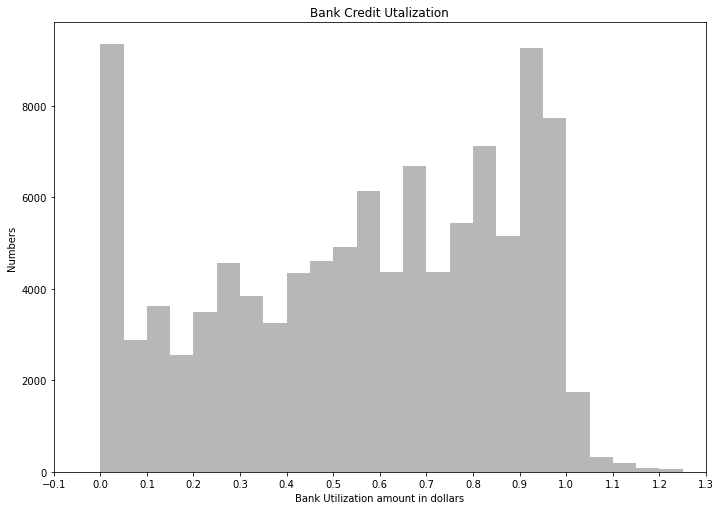

In [50]:
plt.figure(figsize=[ 11.69, 8.27])
bins = np.arange(0 ,1.3,.05)
sb.distplot(loan_data['BankcardUtilization'] , kde=False, bins=bins , color='#4b4a52')
plt.title('Bank Credit Utalization')
plt.xlim((0,1.25))
plt.ylabel('Numbers')
plt.xlabel('Bank Utilization amount in dollars')
plt.xticks(np.arange(-0.1,1.35,.1));

## (Catgorical variables affecting my variable of tnterset )
> Now we will explore more features realted the borrowers beahviour and affecting investor/lener 
- It seems that employment_satus feature is afcting as employed borrowers are the hieghst to recive loans while retired ,      not emplyed and part time employed borrowers are the lowset among borrowers

- pepole with income from 50000- 75000 tends to borrow more than 75000-10000+

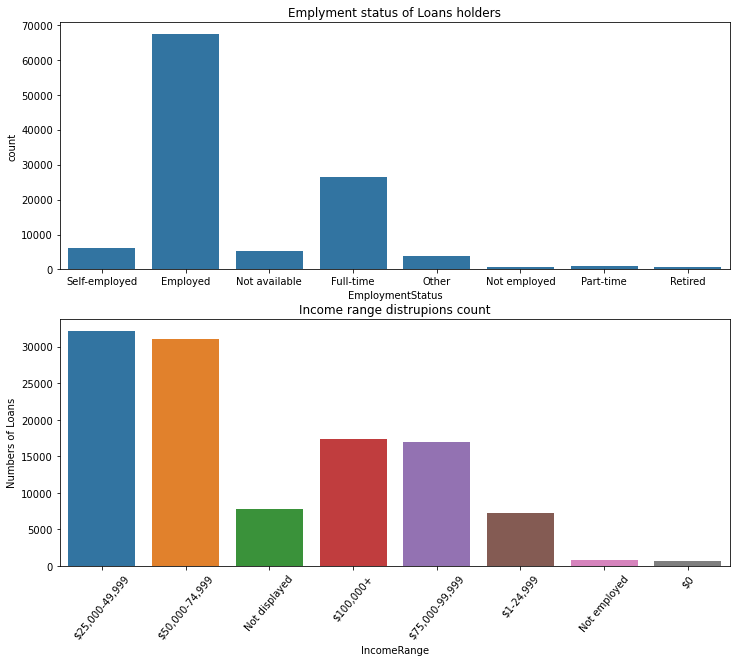

In [101]:
fig, ax = plt.subplots(nrows=2, figsize = [12,10])
default_color = sb.color_palette()[0]
sb.countplot(data = loan_data, x = 'EmploymentStatus', color = default_color, ax = ax[0] ).set_title('Emplyment status of Loans holders')
plt.title('Emplyment satatus for Borowers obtaining loans' )
plt.ylabel('Numbers of Loans')
sb.countplot(data = loan_data, x = 'IncomeRange', ax = ax[1])
plt.xticks(rotation = 50)
plt.title('Income range distrupions count' )
plt.ylabel('Numbers of Loans')

plt.show()

## (EstimatedEffectiveYield​ vs Loan lisiting Catgory)
> IN this plot lets plot loan listing catgory with our variable of interset EstimatedEffectiveYield to observe patterns in the loans catgories
- In this graph we can notice the avrage for the various types of loans is almost around 15-20% estmited effective yeild rate expect for some types 
- Dept conslidation type have alot of the ouliers (data more than 1.5 from the avrage) which is below 0% effictive yeild 
   meaaning estmiated losses ,this type of loan aborrower  obtains a new loans to pay out a number of smaller loans, debts, or bills that they are currently making payments on . 


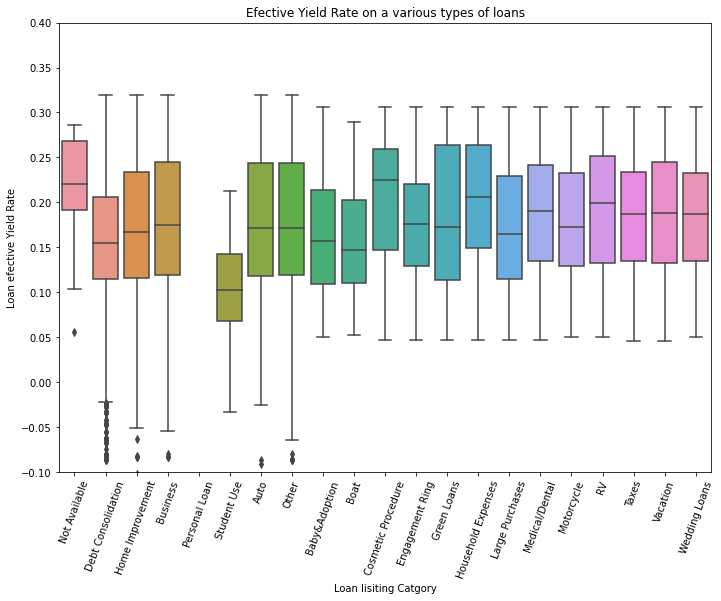

In [65]:
fig, ax = plt.subplots(figsize = [ 11.69, 8.27])
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = 'Not Available',"Debt Consolidation",'Home Improvement','Business',"Personal Loan",'Student Use','Auto','Other','Baby&Adoption',"Boat", 'Cosmetic Procedure',"Engagement Ring",'Green Loans', 'Household Expenses','Large Purchases','Medical/Dental', "Motorcycle", "RV", 'Taxes', 'Vacation', ' Wedding Loans'
sb.boxplot(data=loan_data, x='ListingCategory (numeric)', y='EstimatedEffectiveYield')
plt.title('Efective Yield Rate on a various types of loans')
ax.set_xticklabels(labels);
plt.xticks(rotation= 70);
plt.xlabel('Loan lisiting Catgory')
plt.ylabel('Loan efective Yield Rate')
plt.yticks(np.arange(-.1,1,.05))
plt.ylim(-.1,.4)
plt.show()


## (EstimatedEffectiveYield with every  ProsperRating)
> checking EstimatedEffectiveYield with every  ProsperRating 
- Data with Rating HR(highest ranknig) most of its data lies between 20 & 30 % with peak on 30% of EstimatedEffectiveYield.
- Date with Rating AA(lowest ranknig) most of its data lies between 0 & 10 % with peak around 5% of EstimatedEffectiveYield
- Date with other rating from (B-E) most of its data lies betwwen 10&20% exept for ratinf E which reqirs more invistagtion   is it co-incidnce or errors in the data .
- In General Higher rating led to higher Estamited effective Yeild on loans .


<Figure size 864x864 with 0 Axes>

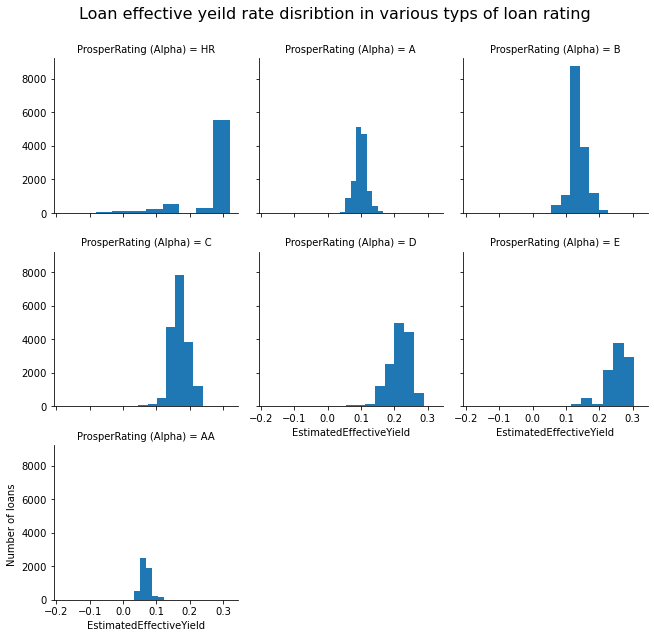

In [134]:
plt.figure(figsize=[12, 12])
# Convert the "loan status " column from a plain object type into an ordered categorical type
Rating_classes = ['HR','A', 'B', 'C', 'D', 'E', 'AA']
Lclasses = pd.api.types.CategoricalDtype(ordered=True, categories=Rating_classes)
loan_data['ProsperRating (Alpha)'] = loan_data['ProsperRating (Alpha)'].astype(Lclasses);
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = loan_data, col = 'ProsperRating (Alpha)',col_wrap=3 ,   margin_titles= False)
g.map(plt.hist, "EstimatedEffectiveYield" )
g.fig.suptitle("Loan effective yeild rate disribtion in various typs of loan rating" , size=16)
g.fig.subplots_adjust(top=0.9)
plt.ylabel('Number of loans ')
plt.show()

## (Investors prefernces and behaviour)
> In this plot we want to look deeply on our investors prefernces and behaviour  interms of loan catgoriesand loan time plan they choseing
- first thing i notice here that investors tends to invest in short term plan (12 months) except for tow typs of loans (personal use & student use they invest in 36 months plan only )
- Investors prfences top 3 were Green loans ,engamment Ring and baby adoptation
- Despite most borrowers choseing 36 months plan ,Investors were likely in 12 months plan which is normal as invstor wants his orignal invsting amount in shorter period time unlike borrower


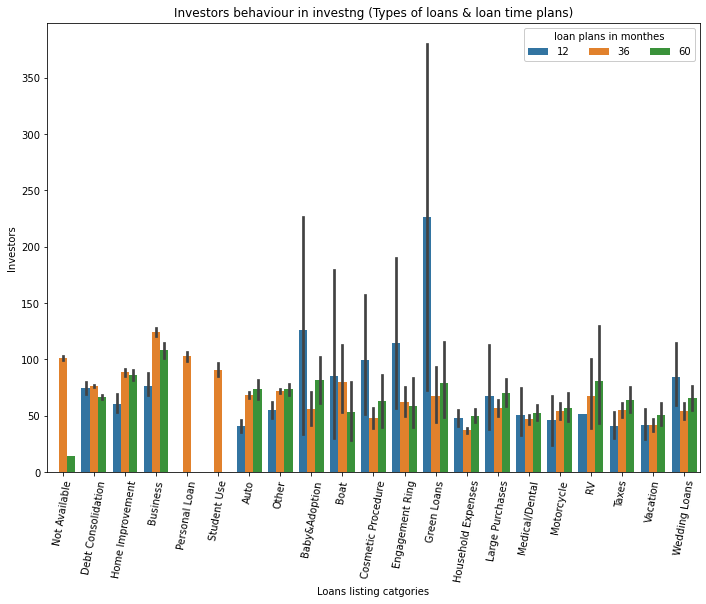

In [70]:
fig, ax = plt.subplots(figsize =[11.69, 8.27])
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = 'Not Available',"Debt Consolidation",'Home Improvement','Business',"Personal Loan",'Student Use','Auto','Other','Baby&Adoption',"Boat", 'Cosmetic Procedure',"Engagement Ring",'Green Loans', 'Household Expenses','Large Purchases','Medical/Dental', "Motorcycle", "RV", 'Taxes', 'Vacation', ' Wedding Loans'
ax = sb.barplot(data = loan_data, x = 'ListingCategory (numeric)', y = 'Investors', hue = 'Term')
ax.legend(loc = 0, ncol = 3, framealpha = 1, title = 'loan plans in monthes')
#sb.boxplot(data=loan_data, x='ListingCategory (numeric)', y='EstimatedEffectiveYield')
plt.title('Investors behaviour in investng (Types of loans & loan time plans)')
ax.set_xticklabels(labels);
plt.xticks(rotation=80)
plt.xlabel('Loans listing catgories')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [96]:
!jupyter nbconvert slide_deck_Prosper_Loan_Data.ipynb --to slides --post serve --no-input --no-prompt
#jupyter nbconvert slide_deck_Prosper_Loan_Data.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_Prosper_Loan_Data.ipynb to slides
[NbConvertApp] Writing 536070 bytes to slide_deck_Prosper_Loan_Data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\user\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_fil